In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Annonimize collateral data

In [3]:
!open /Users/miguel/Documents/collateral.xlsx

In [4]:
df = pd.read_excel('/Users/miguel/Documents/collateral.xlsx', sheetname='Sheet1')

In [5]:
cps = sorted(df.CP.append(df.m).unique())

In [6]:
renames = dict( (v,'C{x}'.format(x=i)) for i,v in enumerate(cps))
f_rename = lambda x: renames[x]
df_anon = pd.DataFrame({'source': df.m.apply(f_rename),
                        'target': df.CP.apply(f_rename),
                        'weight': (df.Exp / df.Exp.sum() * 12345)})
df_anon.to_csv('collateral.csv')

## Read collateral

In [7]:
import networkx as nx

In [8]:
import pandas as pd
df_anon = pd.read_csv('collateral.csv')

In [9]:
credit_net = nx.from_pandas_dataframe(df_anon, 'source', 'target', edge_attr='weight', create_using=nx.DiGraph())

In [10]:
x0 = [n for n in credit_net.nodes_iter() if credit_net.in_degree(n) == 0]
x1 = [n for n in credit_net.nodes_iter() if credit_net.in_degree(n) > 0 and credit_net.out_degree(n) > 0]
x2 = [n for n in credit_net.nodes_iter() if credit_net.out_degree(n) == 0]

In [11]:
!head -n 10 collateral.csv

,source,target,weight
0,C4,C290,0.38891322199382444
1,C6,C204,0.0
2,C6,C258,0.6860975724395493
3,C7,C81,0.779148438005005
4,C7,C269,5.32111785262272
5,C7,C391,4.772858227112057
6,C7,C310,4.931357260127372
7,C7,C441,0.6099054365476856
8,C7,C92,9.50829186163568


<IPython.core.display.Javascript object>


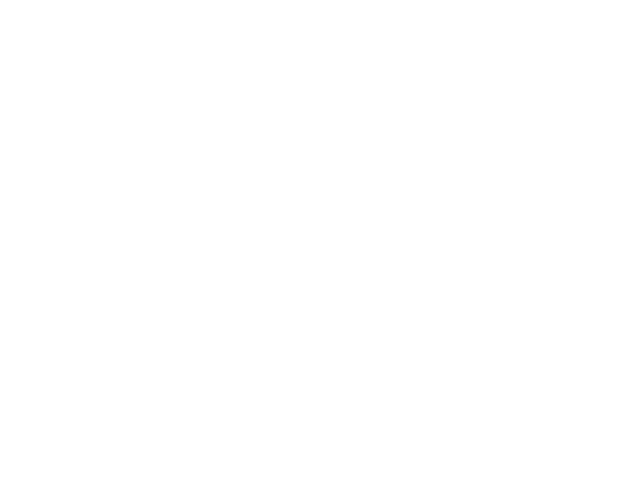

In [12]:
%matplotlib notebook

pos = dict()
pos.update( (n, (1, i*30)) for i, n in enumerate(x0) ) # put pure posters on left
pos.update( (n, (2, i*20+1200)) for i, n in enumerate(x1) ) # put hybrids in the middle
pos.update( (n, (3, i*10)) for i, n in enumerate(x2) ) # put pure issuers on right

nx.draw(credit_net, pos=pos, alpha=0.02, node_size=20)

In [13]:
df_degs = pd.DataFrame({'in': credit_net.out_degree(weight= 'weight'),
                        'out': credit_net.in_degree(weight= 'weight')})

In [14]:
df_degs.ix[x2]

,in,out
C479,0.0,11.749143
C159,0.0,7.383307
C243,0.0,1.412256
C346,0.0,0.020272
C523,0.0,0.903818
C570,0.0,21.097824
C418,0.0,3.760816
C256,0.0,0.006237
C511,0.0,1.413743
C558,0.0,0.311445


<IPython.core.display.Javascript object>


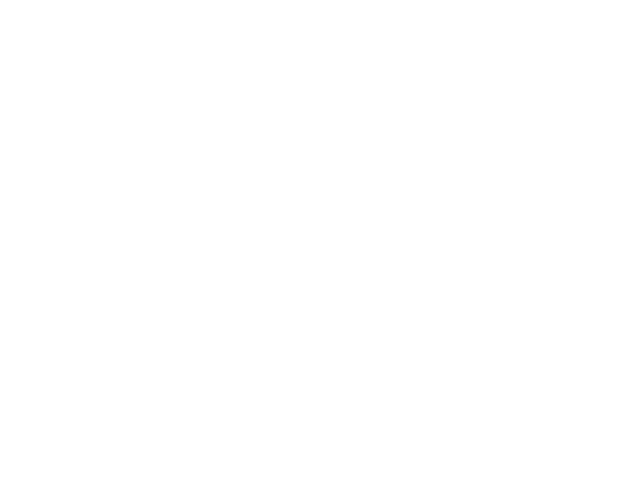

<IPython.core.display.Javascript object>


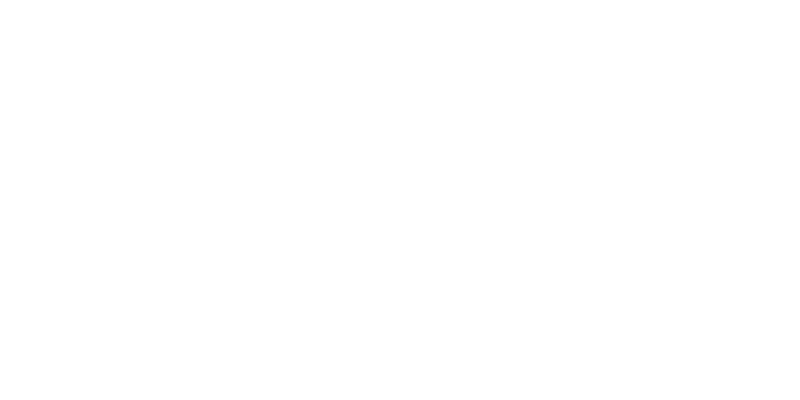

In [15]:
plt.figure('Bipartite-like structure')
df_degs.ix[df_degs['in'] > 0].hist(bins=20, figsize=(10,5));

<IPython.core.display.Javascript object>


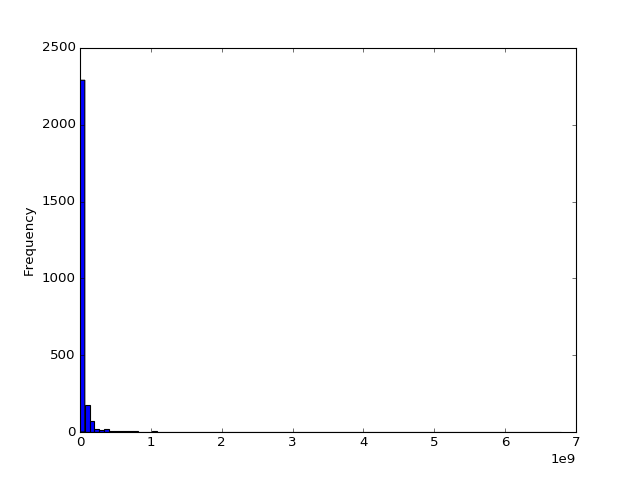

In [16]:
%matplotlib notebook
df.Exp.ix[df.Exp>0].plot.hist(bins=100)

In [19]:
np.log(df.Exp)

/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


0       15.320315
1            -inf
2       15.887978
3       16.015160
4       17.936397
5       17.827659
6       17.860328
7       15.770262
8       18.516878
9       16.806230
10      17.037100
11      17.785563
12      17.616971
13      16.945842
14      17.809078
15      16.810684
16      14.914123
17      15.182959
18       7.767205
19      13.852046
20      14.508897
21      15.561226
22      17.271271
23      18.763405
24      14.218283
25      18.347668
26      16.130011
27      17.728115
28      14.286946
29      16.130019
          ...    
2683    17.103335
2684    16.298110
2685    17.749164
2686    17.097781
2687    16.657402
2688    18.082765
2689    16.425861
2690    15.895593
2691    17.675736
2692    16.674074
2693    13.634853
2694    15.980985
2695    14.177254
2696    14.566756
2697    13.216879
2698    17.896147
2699    17.934428
2700    16.307967
2701    15.775610
2702    16.630900
2703    16.658386
2704    15.552455
2705    16.497037
2706    17.672916
2707    14